### TO DO:
- controllare se ci sono metodi che lui non usa (drop, value_counts, classification_report, classification_report_imbalanced)

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score



# Import red wine data
red_wine = pd.read_csv("../winequality-red.csv", delimiter=';')

# Import white wine data
white_wine = pd.read_csv("../winequality-white.csv", delimiter=';')

# Visualize array dimensions
print("Red wine shape:", red_wine.shape)
print("White wine shape:", white_wine.shape)


Red wine shape: (1599, 12)
White wine shape: (4898, 12)


There are significantly more data samples for white wines compared to red wines.
I decided to analyze the two categories separately at first in order to identify pattern in each group, afterward I'll perform a unified analysis to explore any common trends when combining both datasets.

### Red Wine Analysis
- observations : 1599
- features: 12

In [98]:
red_wine.head(1000)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.7,0.60,0.06,2.00,0.079,19.0,41.0,0.99697,3.39,0.62,10.1,6
996,5.6,0.66,0.00,2.20,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,7
997,5.6,0.66,0.00,2.20,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,7
998,8.9,0.84,0.34,1.40,0.050,4.0,10.0,0.99554,3.12,0.48,9.1,6


Text(0.5, 1.0, 'Distribution of Red Wine Quality')

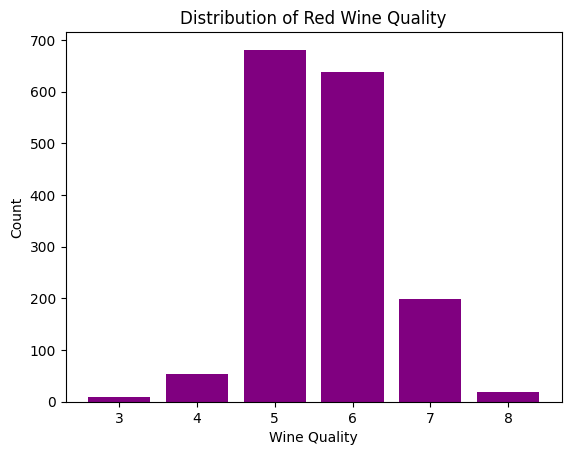

In [99]:
quality_counts = red_wine['quality'].value_counts().sort_index()

xpoints=quality_counts.index
ypoints=quality_counts.values

plt.bar(xpoints, ypoints, color='purple')
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.title("Distribution of Red Wine Quality")

We can see from the graph below that the distribution of data is centered in two values: 5 and 6. We have more than 600 observetions while in the other categories we have at most 200 observation.
I can conclude that the dataset is imbalanced.

In [100]:
x = red_wine.drop('quality', axis=1)
y= red_wine['quality']

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

I'll scale the set, necessary for some models.

In [101]:
# Initialize scaler
scaler = StandardScaler()

# Calculate mean and standard deviation on the training set
scaler.fit(X_train)

# Apply transformation to both set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[-0.68940163, -0.5690129 , -0.49092876, ...,  1.16580531,
        -0.09550325,  0.00459145],
       [-0.39704597, -0.68097713, -0.13315219, ..., -0.21104654,
        -0.3871667 , -0.87141183],
       [-0.74787276, -0.84892348,  1.14462128, ...,  0.51016157,
         0.66282173,  0.97792844],
       ...,
       [-0.86481503,  0.60661152, -1.2064819 , ...,  0.31346845,
        -0.44549939,  0.00459145],
       [-0.6309305 ,  0.21473671, -1.10426002, ...,  0.4445972 ,
        -0.32883401, -0.09274225],
       [-1.27411296, -0.84892348, -0.59315063, ...,  0.70685469,
        -0.50383208, -0.96874553]], shape=(1279, 11))

In [102]:
models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'MLP': MLPClassifier(max_iter=4000),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy')
}

In [103]:
best_models = {}
for name, model in models.items():
    if name == 'Decision Tree':
        x = X_train
        test = X_test
    else:
        x = X_train_scaled
        test = X_test_scaled

    model.fit(x, y_train)
    y_pred = model.predict(test)

    acc = accuracy_score (y_test, y_pred)
    print(f"{name} Accuracy: {acc}")

    if acc >= 0.67:
        best_models[name] = model

SVM Accuracy: 0.625
Logistic Regression Accuracy: 0.55625
MLP Accuracy: 0.625
Decision Tree Accuracy: 0.603125


These accuracy are a little low, let's try if some oversample can make some higher performance

We can notice that the precision is high only for 5 and 6 values of quality.
We have to do some oversampling for the categories with lowest precision.

### SMOTE



In [104]:
from imblearn.over_sampling import SMOTE  #library taken from slide 17

X_resampled, y_resampled = SMOTE(k_neighbors=5).fit_resample(X_train, y_train)

# Scale new X
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

In [105]:
for name, model in models.items():
    if name == 'Decision Tree':
        x_train = X_resampled
        x_test = X_test
    else:
        x_train = X_train_scaled
        x_test = X_test_scaled

    model.fit(x_train, y_resampled)
    y_predicted_train = model.predict(x_train)
    y_predicted_test = model.predict(x_test)

    acc_train = accuracy_score(y_resampled, y_predicted_train)
    acc_test = accuracy_score(y_test, y_predicted_test)

    print('Model: ', name)
    print('Training Accuracy: ', acc_train)
    print('Testing Accuracy: ', acc_test)
    print()


Model:  SVM
Training Accuracy:  0.8157575757575758
Testing Accuracy:  0.509375

Model:  Logistic Regression
Training Accuracy:  0.6327272727272727
Testing Accuracy:  0.425

Model:  MLP
Training Accuracy:  0.9706060606060606
Testing Accuracy:  0.6125

Model:  Decision Tree
Training Accuracy:  1.0
Testing Accuracy:  0.565625



### Random OverSampler

In [106]:
from imblearn.over_sampling import RandomOverSampler

X_resampled, y_resampled = RandomOverSampler(random_state=0).fit_resample(X_train, y_train)

# Scale new X
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_resampled)
X_test_scaled = scaler.transform(X_test)


In [107]:
for name, model in models.items():
    if name == 'Decision Tree':
        x_train = X_resampled
        x_test = X_test
    else:
        x_train = X_train_scaled
        x_test = X_test_scaled

    model.fit(x_train, y_resampled)
    y_predicted_train = model.predict(x_train)
    y_predicted_test = model.predict(x_test)

    acc_train = accuracy_score(y_resampled, y_predicted_train)
    acc_test = accuracy_score(y_test, y_predicted_test)

    print('Model: ', name)
    print('Training Accuracy: ', acc_train)
    print('Testing Accuracy: ', acc_test)
    print()

Model:  SVM
Training Accuracy:  0.796969696969697
Testing Accuracy:  0.5

Model:  Logistic Regression
Training Accuracy:  0.5909090909090909
Testing Accuracy:  0.4

Model:  MLP
Training Accuracy:  0.980909090909091
Testing Accuracy:  0.615625

Model:  Decision Tree
Training Accuracy:  1.0
Testing Accuracy:  0.5625



### Manually Undersampling


In [108]:
n_samples = 100 # number of selected samples

# Select only samples with quality == 5 and do undersampling
df_quality_5 = red_wine[red_wine['quality'] == 5]
df_quality_sampled = df_quality_5.sample(n=n_samples, random_state=42)

# Select other samples
df_other_qualities = red_wine[red_wine['quality'] != 5]

# Combine both samples
df_undersampled = pd.concat([df_other_qualities, df_quality_sampled])
df_undersampled = df_undersampled.reset_index(drop=True)

# Do the same for samples with quality == 6
df_quality_6 = red_wine[red_wine['quality'] == 6]
df_quality_sampled = df_quality_6.sample(n=n_samples, random_state=42)
df_other_qualities = red_wine[red_wine['quality'] != 6]
df_undersampled = pd.concat([df_other_qualities, df_quality_sampled])
df_undersampled = df_undersampled.reset_index(drop=True)

# Do the same for samples with quality == 7
df_quality_7 = red_wine[red_wine['quality'] == 7]
df_quality_sampled = df_quality_7.sample(n=n_samples, random_state=42)
df_other_qualities = red_wine[red_wine['quality'] != 7]
df_undersampled = pd.concat([df_other_qualities, df_quality_sampled])
df_undersampled = df_undersampled.reset_index(drop=True)


# Extract X and Y from updated data
X_undersampled = df_undersampled.drop('quality', axis=1)
y_undersampled = df_undersampled['quality']

Scale Data

In [109]:
scaler = StandardScaler()
scaler.fit(X_undersampled)

X_train_scaled = scaler.transform(X_undersampled)
X_test_scaled = scaler.transform(X_test)

Try executing different models for the new dataset.

In [110]:
for name, model in models.items():
    if name == 'Decision Tree':
        x_train = X_undersampled
        x_test = X_test
    else:
        x_train = X_train_scaled
        x_test = X_test_scaled

    model.fit(x_train, y_undersampled)
    y_predicted_train = model.predict(x_train)
    y_predicted_test = model.predict(x_test)

    acc_train = accuracy_score(y_undersampled, y_predicted_train)
    acc_test = accuracy_score(y_test, y_predicted_test)

    print('Model: ', name)
    print('Training Accuracy: ', acc_train)
    print('Testing Accuracy: ', acc_test)
    print()

Model:  SVM
Training Accuracy:  0.6853333333333333
Testing Accuracy:  0.596875

Model:  Logistic Regression
Training Accuracy:  0.632
Testing Accuracy:  0.528125

Model:  MLP
Training Accuracy:  0.9193333333333333
Testing Accuracy:  0.8625

Model:  Decision Tree
Training Accuracy:  1.0
Testing Accuracy:  0.946875

